In [26]:
import os
import sys

PROJECT_ROOT = \
    os.path.abspath(os.path.join(
        os.path.dirname(""),
        os.pardir))

sys.path.append(PROJECT_ROOT)

In [27]:
import seaborn as sns
import pandas as pd
import numpy as np

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train = pd.read_csv(PROJECT_ROOT + "/data/processed/secondary-engineering/train-engineered-secondary.csv")
test = pd.read_csv(PROJECT_ROOT + "/data/processed/secondary-engineering/test-engineered-secondary.csv")

train = train.drop("Unnamed: 0", axis="columns")
test = test.drop("Unnamed: 0", axis="columns")

In [30]:
train["garage-finished"].value_counts(dropna=False)

garage-finished
False    1108
True      352
Name: count, dtype: int64

In [31]:
for col in train.columns:
    if type(train.loc[4,col]) == str:
        print(col)

In [32]:
train_corrs = train.corr()["sale-price"]

In [33]:
selected_cols = {}
cutoffs = np.round(np.linspace(0, 1, 11), 2)
for cutoff in cutoffs:
    selected_cols[cutoff] = train_corrs.index[(train_corrs.abs() >= cutoff) & (train_corrs.abs() < cutoff + 0.1)]
    print(f"{selected_cols[cutoff].shape[0]} columns have a correlation in interval [{cutoff}, {cutoff + 0.1})")

44 columns have a correlation in interval [0.0, 0.1)
34 columns have a correlation in interval [0.1, 0.2)
10 columns have a correlation in interval [0.2, 0.30000000000000004)
10 columns have a correlation in interval [0.3, 0.4)
6 columns have a correlation in interval [0.4, 0.5)
7 columns have a correlation in interval [0.5, 0.6)
6 columns have a correlation in interval [0.6, 0.7)
2 columns have a correlation in interval [0.7, 0.7999999999999999)
0 columns have a correlation in interval [0.8, 0.9)
0 columns have a correlation in interval [0.9, 1.0)
1 columns have a correlation in interval [1.0, 1.1)


This stratifies the features into difference groups with varying levels of potential predictive value. For example, the best predictors are:

In [34]:
train_corrs[selected_cols[0.7]]

ratings-overall-quality    0.790982
area-above-grade-living    0.708624
Name: sale-price, dtype: float64

Moving below that to the correlations on the interval [0.6, 0.7), we find:

In [35]:
train_corrs[selected_cols[0.6]]

area-basement-total            0.613581
area-floor-1                   0.605852
general-number-garage-spots    0.640409
area-garage                    0.623431
exterior-quality               0.650130
kitchen-quality                0.619235
Name: sale-price, dtype: float64

[0.5, 0.6)...

In [36]:
train_corrs[selected_cols[0.5]]

general-build-year                       0.522897
general-remodel-year                     0.507101
general-number-nonbasement-full-baths    0.560664
general-number-nonbasement-rooms         0.533723
basement-quality                         0.591757
location-northwest                       0.511822
general-years-since-remodel             -0.507101
Name: sale-price, dtype: float64

In [37]:
train_corrs[selected_cols[0.4]]

area-masonry-veneer          0.472614
general-number-fireplaces    0.466929
garage-build-year            0.470177
heating-combined             0.404483
garage-finished              0.419678
northridge-heights           0.402149
Name: sale-price, dtype: float64

In [38]:
train_corrs[selected_cols[0.3]]

lot-frontage                0.326490
area-basement-finished-1    0.386420
area-floor-2                0.319334
area-wood-deck              0.324413
area-open-porch             0.315856
garage-dettached           -0.354141
new-construction            0.357509
basement-access             0.348211
location-downtown          -0.300969
northridge                  0.330424
Name: sale-price, dtype: float64

In [39]:
train_corrs[selected_cols[0.2]]

lot-area                                 0.263843
area-basement-unfinished                 0.214479
general-number-basement-full-baths       0.227122
general-number-nonbasement-half-baths    0.284108
zoning-density                          -0.287306
foundation-modern                        0.235112
central-air-conditioning                 0.251328
electric-modern                          0.242357
driveway-paved                           0.231968
stone-brook                              0.215363
Name: sale-price, dtype: float64

In [40]:
train_corrs[selected_cols[0.1]]

general-number-nonbasement-bedrooms    0.168213
general-number-kitchens               -0.135907
area-closed-porch                     -0.128578
area-screen-porch                      0.111447
multi-family                          -0.137483
stories                                0.115324
has-alley                             -0.123611
adjacent-traffic                      -0.166585
siding-natural                        -0.167996
siding-durable                         0.188118
roof-modern                           -0.104505
fence-quality                         -0.146942
fireplace-quality                      0.184247
home-functionality                     0.107619
basement-unfinished                    0.117901
basement-bedroom                       0.191265
basement-rec-room                     -0.139119
heating-gas                            0.116254
normal-sale                           -0.153990
location-far-north                     0.138251
location-far-southwest                 0

## Choosing features
My instinct is to start with the best correlations and then collect additional features at lower correlations as long as they do not appear to significantly correlate with another one of the selected features.
* [0.7, 0.8)
    * ratings-overall-quality    0.790982
    * area-above-grade-living    0.708624
* [0.6, 0.7)
    * area-basement-total        0.613581
    * area-garage                0.623431
    * exterior-quality           0.650130
    * kitchen-quality            0.619235
* [0.5, 0.6)
    * general-build-year         0.522897
    * general-remodel-year       0.507101
    * general-number-nonbasement-full-baths    0.560664
    * basement-quality                         0.599821
    * pool-combined                            0.543811
    * location-northwest                       0.511822
    * general-years-since-remodel             -0.507101
* [0.4, 0.5)
    * area-masonry-veneer          0.472614
    * general-number-fireplaces    0.466929
    * garage-build-year            0.486362
    * heating-combined             0.404483
    * garage-dettached            -0.406316
    * garage-finished              0.404450
* [0.3, 0.4)
    * lot-frontage                0.326490
    * area-wood-deck              0.324413
    * area-open-porch             0.315856
    * new-construction            0.357509
    * basement-access             0.352958
    * location-downtown          -0.300969
* [0.2, 0.3)
    * lot-area                           0.263843
    * general-number-nonbasement-half-baths    0.284108
    * zoning-density                          -0.287306
    * foundation-modern                        0.235112
    * central-air-conditioning                 0.251328
    * electric-modern                          0.242357
    * driveway-paved                           0.231968

## Checking for colinearity
In the hand-selection process above, I attempted to remove colinear variables based on my own knowledge. Let's view a correlation matrix for all of these to see if there are any unexpected colinearities

In [41]:
selected_cols = [
    "ratings-overall-quality", "area-above-grade-living", "area-basement-total",
    "area-garage", "exterior-quality", "kitchen-quality", "general-build-year",
    "general-remodel-year", "general-number-nonbasement-full-baths", "basement-quality",
    "pool-combined", "location-northwest", "general-years-since-remodel",
    "area-masonry-veneer", "general-number-fireplaces",
    "garage-build-year", "heating-combined", "garage-dettached", "garage-finished", 
    "lot-frontage", "area-wood-deck", "area-open-porch", "new-construction", "basement-access",
    "location-downtown", "lot-area", "general-number-nonbasement-half-baths", "zoning-density", 
    "foundation-modern", "central-air-conditioning", "electric-modern","driveway-paved"]

selected_cols.append("id")
selected_cols.append("sale-price")

In [42]:
train_subset = train[selected_cols]

<Axes: >

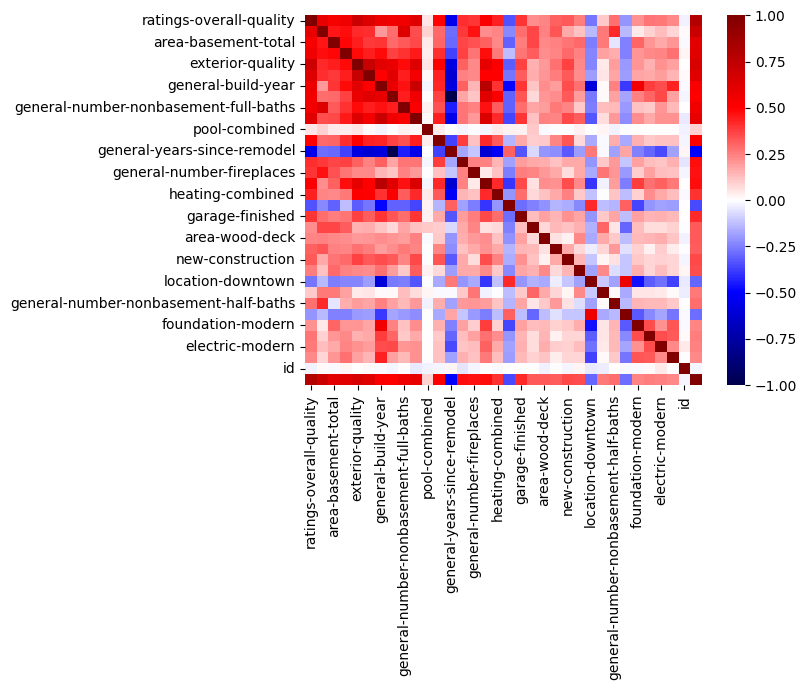

In [43]:
sns.heatmap(train_subset.corr(), vmin=-1, vmax=1, cmap="seismic")

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [45]:
print("The following columns contain NaN values:")
for col in train.columns:
    if train[col].isna().sum() > 0:
        print(f"{col} contains {train[col].isna().sum()} nan values")

The following columns contain NaN values:


In [50]:
# Data Options
TRAIN_FRACTION = 0.8
FEATURES = ["ratings-overall-quality"]
NUM_CROSS_VAL = 5

# Regressor Options
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
N_NEIGHBORS = 5
WEIGHTS = "uniform" # Options are "uniform" or "distance"
ALGORITHM = "auto" # Options are "auto", "ball_tree", "kd_tree", "brute"

knn_regressor = KNeighborsRegressor(n_neighbors=N_NEIGHBORS, weights=WEIGHTS, algorithm=ALGORITHM)

In [48]:
# Obtain the bounds of each cross validation set
cross_val_width = int(train.shape[0] / NUM_CROSS_VAL)
cutoffs = [(i * cross_val_width) for i in range(NUM_CROSS_VAL + 1)]

# Generate a list of training and test datasets based on the cross validation cutoffs
X_cv = []
y_cv = []

for i in range(len(cutoffs) - 1):
    cur_train_set = train.loc[:cutoffs[i], :].copy()
    cur_holdout_set = train.loc[(cutoffs[i] + 1):cutoffs[i+1], :].copy()

    if (i + 1) != len(cutoffs):
        cur_train_set = \
                pd.concat([cur_train_set, train.loc[(cutoffs[i+1]+ 1):, :]], axis="rows")
    
    X_cv.append(cur_train_set)
    y_cv.append(cur_holdout_set)

In [51]:
FEATURES = ["ratings-overall-quality", "kitchen-quality"]

# Setup data for fitting
X = train.loc[:, FEATURES]
y = train["sale-price"]

mses = cross_val_score(knn_regressor, X=X, y=y,
                       scoring="neg_mean_squared_error", cv=5)
rmses = np.absolute(mses) ** 0.5
print(f"Mean Error:\t{np.mean(rmses):>8.2f}")
print(f"Mean StD:\t{np.std(rmses):>8.2f}")

Mean Error:	45646.75
Mean StD:	 4080.49


In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

std_scaler = StandardScaler()

In [71]:
# Separate selected columns into sets that need to be scaled (ints, floats) and those do that not (bools)
train_selected = train[selected_cols]
columns_non_bool_selected = list(train_selected.columns[train_selected.dtypes != bool])
columns_non_bool_selected.remove("id")
columns_non_bool_selected.remove("sale-price")
columns_bool_selected = list(train_selected.columns[train_selected.dtypes == bool])

# Scale the numeric features to mean ~ 0 and variance ~ 1
train_selected_scaled = std_scaler.fit_transform(train_selected[columns_non_bool_selected])

# Convert the outputted numpy.array back into a dataframe
train_selected_scaled = \
    pd.DataFrame(data=train_selected_scaled,
                 columns=columns_non_bool_selected)

# Combined the scaled features back with the non-scaled features
train_processed = pd.concat(
    [train_selected["id"], train_selected_scaled, train_selected[columns_bool_selected]],
    axis="columns")

In [73]:
FIT_INTERCEPT = True
LINEAR_CROSS_VAL_FOLD = 5
ridge_cv = RidgeCV(fit_intercept=FIT_INTERCEPT, cv=LINEAR_CROSS_VAL_FOLD)

In [76]:
LINEAR_REG_FEATURES = ["ratings-overall-quality"]
ridge_cv.fit(X=X[LINEAR_REG_FEATURES], y=train_selected["sale-price"]);

In [ ]:
ridge_cv.predict()

---
---
---

In [44]:
feature_columns = list(train.columns)
feature_columns.remove("sale-price")

X = train[["ratings-overall-quality"]]
y = train["sale-price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
train_cutoff = int(train.shape[0] * TRAIN_FRACTION)
train_set = train.iloc[:train_cutoff, :]
test_set = train.iloc[train_cutoff:, :]

In [52]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_predicted = knn_regressor.predict(X_test)
score = knn_regressor.score(X_test, y_test)
score

0.6202496381339719

In [50]:
kf = KFold(n_splits=5, shuffle=True)

knn_regressor = KNeighborsRegressor(n_neighbors=5)

mses = cross_val_score(knn_regressor, X, y, scoring="neg_mean_squared_error", cv=kf)
rmses = np.absolute(mses) ** 2

In [51]:
mses

array([-1.94184418e+09, -3.05073677e+09, -2.12133209e+09, -2.39836432e+09,
       -2.10370620e+09])